In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire          98
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
235,30,65,14,0.0,85.4,16.0,44.5,4,16.9,6.5,1,1
236,28,87,15,4.4,41.1,6.5,8.0,0,6.2,0.0,0,1
237,27,87,29,0.5,45.9,3.5,7.9,0,3.4,0.2,0,1
238,24,54,18,0.1,79.7,4.3,15.2,1,5.1,0.7,0,1
239,24,64,15,0.2,67.3,3.8,16.5,1,4.8,0.5,0,1


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    103
Name: count, dtype: int64

In [11]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1,3.9,0,0


In [37]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
235    6.5
236    0.0
237    0.2
238    0.7
239    0.5
Name: FWI, Length: 240, dtype: float64

In [38]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [39]:
X_train.shape,X_test.shape

((180, 11), (60, 11))

In [40]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.665096,-0.360453,-0.323382,0.686284,0.493958,0.389320,0.602931,0.469450,0.515305,0.255838
RH,-0.665096,1.000000,0.267826,0.211859,-0.619356,-0.365434,-0.185669,-0.678798,-0.310633,-0.398770,-0.390461
Ws,-0.360453,0.267826,1.000000,0.303319,-0.229800,-0.021053,0.056838,-0.063815,0.008139,-0.108548,-0.194943
Rain,-0.323382,0.211859,0.303319,1.000000,-0.539117,-0.272096,-0.286354,-0.324720,-0.282768,-0.369215,-0.063139
FFMC,0.686284,-0.619356,-0.229800,-0.539117,1.000000,0.604497,0.508735,0.731419,0.589524,0.760663,0.233498
DMC,0.493958,-0.365434,-0.021053,-0.272096,0.604497,1.000000,0.876616,0.677617,0.983756,0.604478,0.178568
DC,0.389320,-0.185669,0.056838,-0.286354,0.508735,0.876616,1.000000,0.503660,0.946668,0.524998,-0.117323
ISI,0.602931,-0.678798,-0.063815,-0.324720,0.731419,0.677617,0.503660,1.000000,0.633077,0.733654,0.278901
BUI,0.469450,-0.310633,0.008139,-0.282768,0.589524,0.983756,0.946668,0.633077,1.000000,0.595964,0.072510
Classes,0.515305,-0.398770,-0.108548,-0.369215,0.760663,0.604478,0.524998,0.733654,0.595964,1.000000,0.150208


<Axes: >

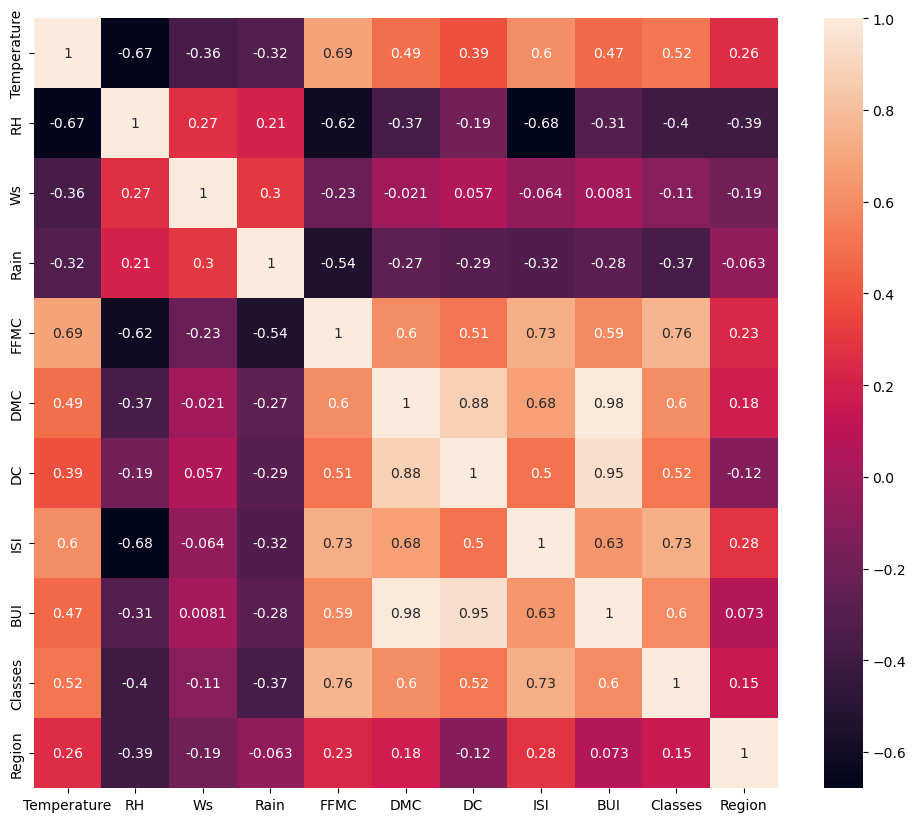

In [42]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [43]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [44]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [45]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((180, 9), (60, 9))

## Feature Scaling Or Standardization

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [47]:
X_train_scaled

array([[-0.85059547,  0.70039714,  0.56850263, ..., -0.799089  ,
        -1.09321633, -0.9459053 ],
       [-1.11826538, -0.78121219,  0.56850263, ..., -0.799089  ,
        -1.09321633,  1.05718828],
       [-1.65360518,  1.17181829,  0.17187289, ..., -1.04123718,
        -1.09321633, -0.9459053 ],
       ...,
       [-1.92127509,  0.90243477,  0.56850263, ..., -1.04123718,
        -1.09321633, -0.9459053 ],
       [ 1.55843366, -0.71386631, -0.6213866 , ..., -0.55694082,
        -1.09321633,  1.05718828],
       [-0.58292557,  0.96978065,  2.15502162, ..., -0.799089  ,
        -1.09321633, -0.9459053 ]])

## Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

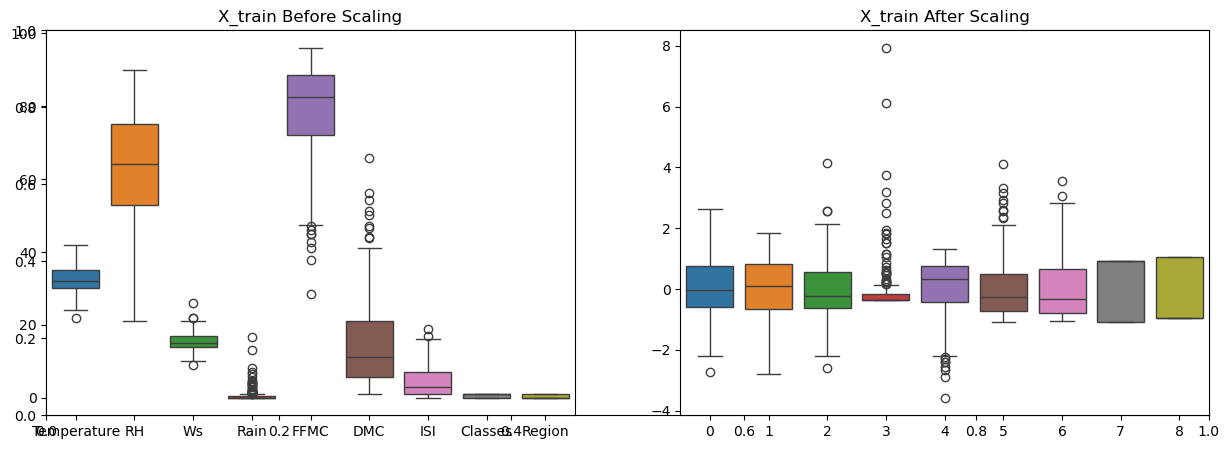

In [48]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model

Mean absolute error 0.8623888892393629
R2 Score 0.9729708198199242


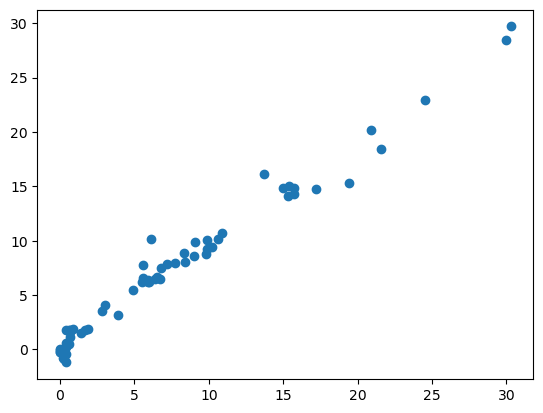

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean absolute error 1.3637218490727294
R2 Score 0.9361647398886338


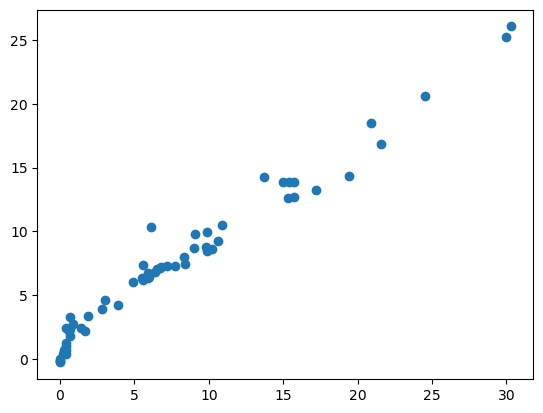

In [50]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Cross Validation Lasso

In [51]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [52]:
lassocv.alpha_

np.float64(0.03357201880418444)

In [53]:
lassocv.alphas_

array([6.74540081, 6.29078338, 5.86680563, 5.47140257, 5.10264835,
       4.75874693, 4.43802331, 4.13891539, 3.85996635, 3.59981753,
       3.35720188, 3.13093771, 2.91992299, 2.72312995, 2.53960011,
       2.36843956, 2.20881466, 2.05994794, 1.92111435, 1.79163767,
       1.67088729, 1.55827508, 1.45325255, 1.35530819, 1.26396496,
       1.17877795, 1.09933226, 1.02524095, 0.95614314, 0.89170229,
       0.83160454, 0.77555718, 0.72328722, 0.67454008, 0.62907834,
       0.58668056, 0.54714026, 0.51026483, 0.47587469, 0.44380233,
       0.41389154, 0.38599663, 0.35998175, 0.33572019, 0.31309377,
       0.2919923 , 0.272313  , 0.25396001, 0.23684396, 0.22088147,
       0.20599479, 0.19211143, 0.17916377, 0.16708873, 0.15582751,
       0.14532526, 0.13553082, 0.1263965 , 0.11787779, 0.10993323,
       0.10252409, 0.09561431, 0.08917023, 0.08316045, 0.07755572,
       0.07232872, 0.06745401, 0.06290783, 0.05866806, 0.05471403,
       0.05102648, 0.04758747, 0.04438023, 0.04138915, 0.03859

In [54]:
lassocv.mse_path_

array([[33.4370474 , 48.91773439, 40.96739483, 77.96590712, 66.48883681],
       [29.53443381, 43.11985732, 35.59877246, 77.96590712, 63.25935938],
       [26.1202855 , 38.01905528, 30.50164653, 70.87219651, 57.00538628],
       [23.13239505, 33.55841183, 26.16187265, 64.44089777, 51.5204671 ],
       [20.51636113, 29.65609679, 22.47451813, 58.76881836, 46.70750053],
       [18.22507043, 26.24101714, 19.34870013, 53.60557819, 41.35001849],
       [16.21722901, 23.25107895, 16.70584728, 47.21987696, 36.03935441],
       [14.45692781, 20.63223321, 14.47792465, 41.64468849, 31.42426101],
       [12.91286688, 18.33731735, 12.60605072, 36.77576831, 27.41353094],
       [11.55766654, 16.3254221 , 11.03953746, 32.52246581, 23.92925526],
       [10.36773229, 14.56069393,  9.73440868, 28.80528643, 20.90209277],
       [ 9.32221056, 13.01194219,  8.65275392, 25.55669158, 18.27228243],
       [ 8.40300432, 11.65197129,  7.76186111, 22.71617182, 15.98786241],
       [ 7.5943257 , 10.45706482,  7.0

Mean absolute error 0.8813621735409691
R2 Score 0.972446018441465


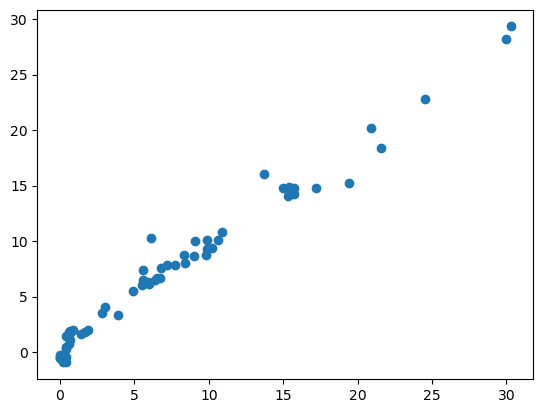

In [55]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

## Ridge Regression model

Mean absolute error 0.8823891654086335
R2 Score 0.9723105364055891


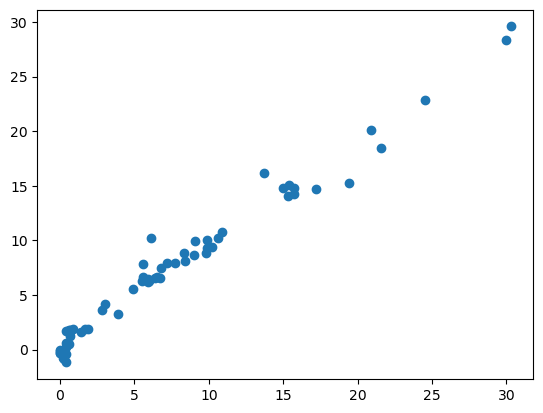

In [56]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.0631593005260673
R2 Score 0.9648848435872178


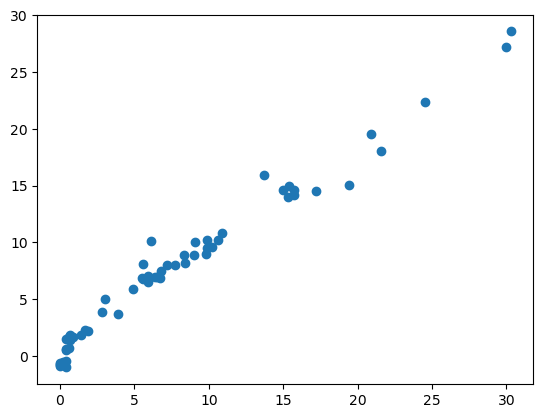

In [57]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [58]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## Elasticnet Regression

Mean absolute error 2.0743974993867424
R2 Score 0.8626867971294347


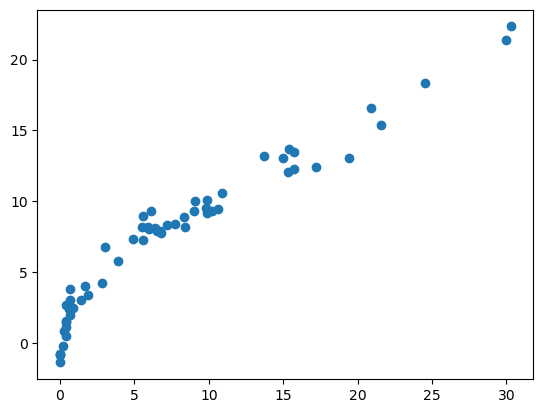

In [60]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.9764205180990114
R2 Score 0.9689262047921474


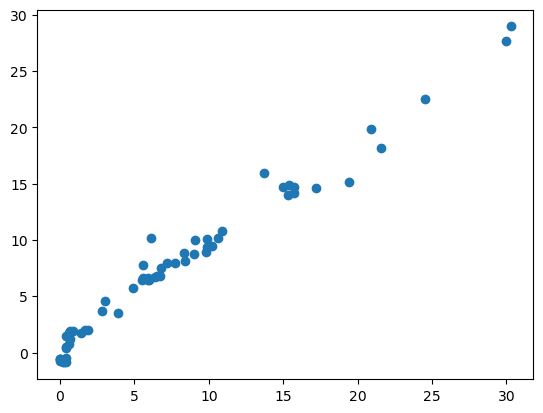

In [61]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [36]:
elasticcv.alphas_

array([13.49080163, 12.58156675, 11.73361126, 10.94280513, 10.20529669,
        9.51749385,  8.87604662,  8.27783078,  7.71993269,  7.19963507,
        6.71440376,  6.26187542,  5.83984597,  5.4462599 ,  5.07920021,
        4.73687912,  4.41762932,  4.11989589,  3.84222869,  3.58327534,
        3.34177457,  3.11655015,  2.9065051 ,  2.71061639,  2.52792991,
        2.3575559 ,  2.19866452,  2.05048189,  1.91228627,  1.78340458,
        1.66320908,  1.55111435,  1.44657444,  1.34908016,  1.25815668,
        1.17336113,  1.09428051,  1.02052967,  0.95174939,  0.88760466,
        0.82778308,  0.77199327,  0.71996351,  0.67144038,  0.62618754,
        0.5839846 ,  0.54462599,  0.50792002,  0.47368791,  0.44176293,
        0.41198959,  0.38422287,  0.35832753,  0.33417746,  0.31165502,
        0.29065051,  0.27106164,  0.25279299,  0.23575559,  0.21986645,
        0.20504819,  0.19122863,  0.17834046,  0.16632091,  0.15511144,
        0.14465744,  0.13490802,  0.12581567,  0.11733611,  0.10